In [ ]:
#!pip install sentinelhub

This notebook show how to use the odc_sh engine in order to load the Sentinel data using SentinelHUB.

In [1]:
import os 
import numpy as np
import xarray as xr
import rioxarray as xrio
import matplotlib.pyplot as plt
import datetime
import cartopy.crs as ccrs
from sentinelhub import DataCollection
import pandas

%matplotlib inline

from odc_sh import engine

In [2]:
sh_client_id=""
sh_client_secret=""

if not sh_client_id:
    sh_client_id = %env SH_CLIENT_ID

if not sh_client_secret:
    sh_client_secret = %env  SH_CLIENT_SECRET

print(sh_client_id)
print(sh_client_secret)

cf55e719-c4d9-43b5-9e29-87e182491327
ndMyXtFj_AaJUJb8u.>Lqu#3mZG;,Hi@%cCOznm]


Load data from Sentinel HUB. For other collections check the DataCollection or examples folder.

List all available collections (in some cases additional filter is needed in order to differenciate between the collection ids - e. g. DataCollection.SENTINEL1)

Initialize datacube engine

In [3]:
dc = engine.Datacube(sh_client_id=sh_client_id, sh_client_secret=sh_client_secret)

In [4]:
products = dc.list_sh_products()
#products

In [5]:
bands = dc.list_sh_bands()
#bands

In [6]:
col = dc.get_collection("SENTINEL2_L1C")
#col.bands

Load Sentinel 1 IW data. Additional filter with polarization needs to be specified. You can also limit the data by orbit.

In [7]:
resolution = 20  # in meters
longitude = (11.987527, 12.004914)
latitude = (41.990797, 42.018348)

time = ("2019-01-01", "2019-01-04")

ds = dc.load(
    product=DataCollection.SENTINEL2_L1C,
    latitude=latitude,
    longitude=longitude,
    time=time,
    sh_resolution=resolution,
)

Searching for new products
measurement: {'name': 'B01', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B02', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B03', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B04', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B05', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B06', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B07', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B08', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B8A', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B09', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B10', 'units': 'REFLECTANCE', 'dtype': 'float32', 'nodata': 0}
measurement: {'name': 'B11'

  0%|          | 0/1 [00:00<?, ?it/s]

---------------------------------------------
longitude: 11.987527, 12.004914; latitude: 41.990797, 42.018348; resolution: 20 m; crs: EPSG:4326; time: 2019-01-04 


  0%|          | 0/1 [00:00<?, ?it/s]

Adding crs to result: EPSG:4326


Display properties of the x-array datacube

Check the crs of the downloaded xarray

In [8]:
ds.rio.crs

CRS.from_epsg(4326)

Store downloaded data to .nc format

In [13]:
#ds.to_netcdf("s2_all_bands.nc")

Store downloaded data as cog file

In [11]:
new = ds.sel(time=ds.time[0], bands=['B04','B03','B02'], drop=True).transpose('bands', 'y', 'x')
new = new.rio.set_crs(ds.rio.crs)
new.rio.to_raster(raster_path="image_cog_8.tif", driver="COG")

You can load the data 

In [ ]:
#ds_stored = xr.open_dataset("s2_all_bands.nc")
#ds_stored

Dislay available time intervals

In [ ]:
for t in ds.time:
    print(f"times: {t.data}")

Get first available frame

time: 2019-01-01T00:00:00.000000000
time: 2019-01-04T00:00:00.000000000


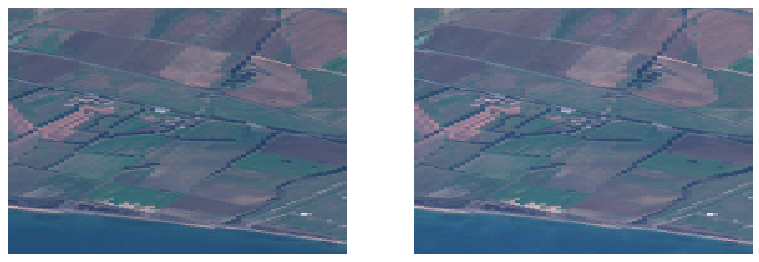

In [8]:
#crs = ccrs.UTM("18")
fig, ax = plt.subplots(nrows=1, ncols=len(ds.time), figsize=(12, 4), dpi=80)

for idx, t in enumerate(ds.time):
    print(f"time: {t.data}")
    single_time_frame = ds.sel(time=ds.time[idx], bands=['B04','B03','B02'], drop=True)
    single_time_frame= single_time_frame / single_time_frame.data.max()
    imgplot = single_time_frame.plot.imshow(ax=ax[idx], x="x", y="y", rgb="bands")
    imgplot.set_cmap('OrRd')
    ax[idx].axis('off')
plt.show()